### Installing PyDrive

In [1]:
!pip install -U -q PyDrive
!pip install pydrive --upgrade

Requirement already up-to-date: pydrive in /usr/local/lib/python3.6/dist-packages (1.3.1)


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# After a specific amount of time Pydrive logs out, the enxt function checks for that and if it has happend trys log in again
# you will not to log in to your account just the first time, the next times it will be automatic, we will use this function later on.
def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


## Importing modules

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


# After a specific amount of time Pydrive logs out, the enxt function checks for that and if it has happend trys log in again
# you will not to log in to your account just the first time, the next times it will be automatic, we will use this function later on.
def authorizeIfLoggedOut():
  try:
    file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

  except:    
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)


In [5]:

# this will just check if we are logged out it logs in
authorizeIfLoggedOut()

file_list_GDrive = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()

for file1 in file_list_GDrive:  
    if "Behzad_Project" in file1['title']:
        Folder_ID_Behzad_Project= file1['id']

print(Folder_ID_Behzad_Project)

file_list_Behzad_Project = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Behzad_Project}).GetList()

for file2 in file_list_Behzad_Project:  
    if "Data" in file2['title']:
        Folder_ID_Data= file2['id']
        
for file4 in file_list_Behzad_Project:
  
    if "Figures" in file4['title']:
        Folder_ID_Figures= file4['id']        
        
        
file_list_Data = drive.ListFile({'q': "'%s' in parents and trashed=false" % Folder_ID_Data}).GetList()

for file3 in file_list_Data:  
    if "electricity.csv" in file3['title']:
        print ("electricity.csv exists")
        ID_electricity= file3['id']
        file_electricity = drive.CreateFile({'id': ID_electricity})
        file_electricity.GetContentFile('electricity.csv') 

for file5 in file_list_Data:  
  if "LBNL_extra.csv" in file5['title']:
    print ("LBNL_extra.csv exists")
    ID_LBNL_extra= file5['id']
    file_LBNL_extra = drive.CreateFile({'id': ID_LBNL_extra})
    file_LBNL_extra.GetContentFile('LBNL1_extra.csv')    


1AA6Z3AwUf-wNk7z1YuVfouA9CfhRe1wg
electricity.csv exists
LBNL_extra.csv exists


# Functions

In [0]:
def gdrive_authorize():
  authorizeIfLoggedOut()
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

In [0]:
def LoadFile(fileName):
  for file in file_list_Data:  
    if fileName in file['title']:
        print (fileName+ " exists")
        ID_fileName= file['id']
        file_fileName = drive.CreateFile({'id': ID_fileName})
        file_fileName.GetContentFile(fileName)

In [0]:
def CSV2DF(fileName):
  authorizeIfLoggedOut()
  auth.authenticate_user()
  gauth = GoogleAuth()
  gauth.credentials = GoogleCredentials.get_application_default()
  drive = GoogleDrive(gauth)

  for file in file_list_Data:  
    if fileName in file['title']:
        print (fileName+ " exists")
        ID_fileName= file['id']
        file_fileName = drive.CreateFile({'id': ID_fileName})
        file_fileName.GetContentFile(fileName) 
  DF_output = pd.read_csv(fileName, sep =",", index_col = 0)
  oldIndex_DF_output = DF_output.index
  newIndex_DF_output = pd.to_datetime(oldIndex_DF_output)
  DF_output.index = newIndex_DF_output
  return(DF_output)

In [0]:
def DFWriter(df,file_name):
  Files_folder ="drive/My Drive/Behzad_Project"
  path = os.path.join(Files_folder,file_name)
  
  df.to_csv(path, encoding='utf-8')

In [0]:
def WeekendDetector(day):
    if (day == 5 or day==6):
        weekendLabel = 1
    else:
        weekendLabel = 0
    return weekendLabel

  

In [0]:
def workingHourDetector(hour):
    if (hour>=9 and hour <= 17):
        workingHourLabel = 1
    else:
        workingHourLabel = 0
    return workingHourLabel  

In [0]:
def lag_gen_feature(inputDF,columnName,lag_start,lag_end,lag_interval):
    for i in range(lag_start,lag_end+1, lag_interval):
        new_column_name = columnName+" -"+str(i)+"h"
        if new_column_name in inputDF.columns:
            pass
        else:
            print (new_column_name)
            inputDF.loc[:,new_column_name] = inputDF.loc[:,columnName].shift(i)
            inputDF.dropna(inplace=True)
    return inputDF



In [0]:
def remove_feature(inputDF,feature):
  if feature in inputDF.columns:
    inputDF.drop(feature, axis=1, inplace=True)
    inputDF.dropna(inplace=True)
    print (feature + " was removed succesfully from the dataframe")
    return inputDF


In [0]:
def remove_anomaly(inputDF,index,remove_target):
  if np.size(index)==0:
    pass
  else:
    for i in index:
      inputDF.loc[index,remove_target] = None
      inputDF.dropna(inplace=True)

#we can also use the concat method used in the code
 

# Importing datasets



## Electricity Consumption


### Importing and formatting the consumption Dataset


In [15]:
# Comment by Arian: As we want to export file in the google drive we have to mount it first by the following command
# Attentin: When calling a directory you should drop "/content" at the begining of the path; as I defined in the saving path in DFWriter functoin.
from google.colab import drive
drive.mount('/content/drive')

# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append('local_modules')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using the CSV2DF function 

to import datasets as dataframes and convert the index to date-time format simultaneously and neatly!

Attention ! : I don't know why but while using google colab, you have to run the "authorizeIfLoggedOut" part again otherwise the function "CSV2DF" ends up with the error of not recognizing Google's "CreateFile" function!

In [16]:

DF_main =CSV2DF("electricity.csv")


electricity.csv exists


In [17]:
DF_main_clean = DF_main.dropna() 
DFWriter(DF_main_clean,"DF_main_clean.csv")
DF_main_clean

,consumption
Timestamp,
2014-01-01 00:30:00,22.81250
2014-01-01 00:45:00,24.66500
2014-01-01 01:00:00,24.17250
2014-01-01 01:15:00,24.95000
2014-01-01 01:30:00,23.61750
...,...
2015-06-30 22:45:00,35.97594
2015-06-30 23:00:00,29.00007
2015-06-30 23:15:00,31.00000


So in this way we completely remove the rows in which there is one NaN
If you wanted to apply dropna on DF_main itself you have two options
DF_main = DF_main.dropna()
DF_main.dropna(inplace=True)

### Importing and formatting extra data from Data Loggers of LBNL74 

In [0]:
#LoadFile("LBNL1_2014.csv")
#LoadFile("LBNL1_2015.csv")
#LoadFile("LBNL_extra_clean.csv")

In [19]:
DF_extra_clean=CSV2DF("LBNL_extra_clean.csv")
DF_extra_clean.tail(30)

LBNL_extra_clean.csv exists


,temp_set_1,temp_set_2,RH,wind_speed,precep,rad
Date Time,,,,,,
2015-06-30 16:30:00,77.56,76.57,37.27,5.53,0.0,626.40
2015-06-30 16:45:00,75.76,74.75,40.37,5.77,0.0,604.70
2015-06-30 17:00:00,74.28,73.71,40.25,3.85,0.0,587.80
2015-06-30 17:15:00,74.07,73.44,40.73,1.81,0.0,530.30
2015-06-30 17:30:00,73.98,73.63,41.52,0.76,0.0,502.20
2015-06-30 17:45:00,76.30,75.67,39.42,0.43,0.0,519.80
2015-06-30 18:00:00,75.90,75.40,41.15,0.29,0.0,474.90
2015-06-30 18:15:00,75.15,74.91,42.74,0.47,0.0,439.10
2015-06-30 18:30:00,75.04,74.52,44.39,0.34,0.0,390.90


In [20]:
DF_main_clean.tail(30)

,consumption
Timestamp,
2015-06-30 16:30:00,63.03200
2015-06-30 16:45:00,54.94390
2015-06-30 17:00:00,44.99202
2015-06-30 17:15:00,46.03200
2015-06-30 17:30:00,50.03201
2015-06-30 17:45:00,42.96788
2015-06-30 18:00:00,47.00800
2015-06-30 18:15:00,53.00767
2015-06-30 18:30:00,37.97601


Now We merge the two dataframes 

In [21]:
DF_extra_clean.drop_duplicates(inplace=True)
DF_main_clean.drop_duplicates(inplace=True)
#result = DF_main_clean.merge(DF_extra_clean)
DF_joined=pd.merge( DF_main_clean, DF_extra_clean, left_index=True, right_index=True)
DF_joined

,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad
2014-01-01 22:00:00,24.97000,57.34,57.87,29.29,0.00,0.0,0.00
2014-01-01 22:15:00,22.94750,56.44,57.69,29.87,0.00,0.0,0.00
2014-01-01 22:30:00,23.41250,56.23,57.36,30.42,0.00,0.0,0.00
2014-01-01 22:45:00,24.51250,56.26,58.14,31.14,0.00,0.0,0.00
2014-01-01 23:00:00,23.82000,57.24,58.50,30.08,0.00,0.0,0.00
...,...,...,...,...,...,...,...
2015-06-30 19:30:00,51.99200,82.90,82.71,28.94,1.07,0.0,191.10
2015-06-30 19:45:00,51.95200,79.59,81.61,36.39,0.02,0.0,144.20
2015-06-30 20:00:00,47.01600,73.71,76.44,49.31,0.00,0.0,96.00
2015-06-30 22:15:00,30.95992,65.16,65.17,60.23,0.00,0.0,0.17


## Gas Consumption (!!!to be filed!!!)

# Adding time-related Features

The first thing I would do its to extract the hour and assign it to a column called hour !


### For Electricity Consumption

In [22]:
DF_joined.loc[:,"hour"]=DF_joined.index.hour
DF_joined.head(30)

,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour
2014-01-01 22:00:00,24.9700,57.34,57.87,29.29,0.00,0.0,0.0,22
2014-01-01 22:15:00,22.9475,56.44,57.69,29.87,0.00,0.0,0.0,22
2014-01-01 22:30:00,23.4125,56.23,57.36,30.42,0.00,0.0,0.0,22
2014-01-01 22:45:00,24.5125,56.26,58.14,31.14,0.00,0.0,0.0,22
2014-01-01 23:00:00,23.8200,57.24,58.50,30.08,0.00,0.0,0.0,23
2014-01-01 23:15:00,25.6825,57.43,58.66,30.39,0.00,0.0,0.0,23
2014-01-01 23:30:00,23.0175,58.08,59.29,28.79,0.00,0.0,0.0,23
2014-01-01 23:45:00,24.4200,58.42,58.80,29.85,0.00,0.0,0.0,23
2014-01-02 00:00:00,23.2550,56.44,56.71,35.34,1.12,0.0,0.0,0
2014-01-02 00:15:00,22.4550,57.99,58.50,31.80,0.00,0.0,0.0,0


In [23]:
DF_joined.loc[:,"sin(hour)"] = np.sin(DF_joined.index.hour*2*np.pi/24)
DF_joined.loc[:,"cos(hour)"] = np.cos(DF_joined.index.hour*2*np.pi/24)

DF_joined.head(30)



,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour)
2014-01-01 22:00:00,24.9700,57.34,57.87,29.29,0.00,0.0,0.0,22,-0.500000,0.866025
2014-01-01 22:15:00,22.9475,56.44,57.69,29.87,0.00,0.0,0.0,22,-0.500000,0.866025
2014-01-01 22:30:00,23.4125,56.23,57.36,30.42,0.00,0.0,0.0,22,-0.500000,0.866025
2014-01-01 22:45:00,24.5125,56.26,58.14,31.14,0.00,0.0,0.0,22,-0.500000,0.866025
2014-01-01 23:00:00,23.8200,57.24,58.50,30.08,0.00,0.0,0.0,23,-0.258819,0.965926
2014-01-01 23:15:00,25.6825,57.43,58.66,30.39,0.00,0.0,0.0,23,-0.258819,0.965926
2014-01-01 23:30:00,23.0175,58.08,59.29,28.79,0.00,0.0,0.0,23,-0.258819,0.965926
2014-01-01 23:45:00,24.4200,58.42,58.80,29.85,0.00,0.0,0.0,23,-0.258819,0.965926
2014-01-02 00:00:00,23.2550,56.44,56.71,35.34,1.12,0.0,0.0,0,0.000000,1.000000
2014-01-02 00:15:00,22.4550,57.99,58.50,31.80,0.00,0.0,0.0,0,0.000000,1.000000


Now let's do the same thing for other parameters (day of week, month, week of year

In [24]:
DF_joined.loc[:,"month"] = DF_joined.index.month
DF_joined.loc[:,"dayOfWeek"]=DF_joined.index.dayofweek
DF_joined.loc[:,"weekOfYear"] = DF_joined.index.week
DF_joined.tail(52)

,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear
2015-06-28 09:30:00,35.03997,57.07,56.64,90.50,6.55,0.0,190.60,9,7.071068e-01,-7.071068e-01,6,6,26
2015-06-29 01:15:00,24.06400,54.55,54.48,94.50,5.46,0.0,0.00,1,2.588190e-01,9.659258e-01,6,0,27
2015-06-29 08:30:00,31.02396,54.82,54.36,91.50,2.75,0.0,185.70,8,8.660254e-01,-5.000000e-01,6,0,27
2015-06-29 09:15:00,78.98400,56.86,55.47,88.80,4.05,0.0,523.00,9,7.071068e-01,-7.071068e-01,6,0,27
2015-06-29 09:45:00,68.74662,58.06,56.14,85.80,2.71,0.0,643.50,9,7.071068e-01,-7.071068e-01,6,0,27
2015-06-29 10:15:00,61.71682,60.19,59.49,80.50,2.86,0.0,722.70,10,5.000000e-01,-8.660254e-01,6,0,27
2015-06-29 10:45:00,39.03999,61.20,60.33,77.03,1.57,0.0,796.50,10,5.000000e-01,-8.660254e-01,6,0,27
2015-06-29 11:30:00,40.99204,63.72,62.91,68.19,2.28,0.0,893.00,11,2.588190e-01,-9.659258e-01,6,0,27
2015-06-29 13:00:00,46.01601,66.90,65.95,64.07,2.95,0.0,994.00,13,-2.588190e-01,-9.659258e-01,6,0,27
2015-06-29 13:45:00,47.99200,68.95,67.84,61.23,2.15,0.0,1000.00,13,-2.588190e-01,-9.659258e-01,6,0,27


We can now apply these functions on the corresponding colums

In [0]:
DF_joined.loc[:,"weekendLabel"] = DF_joined.loc[:,"dayOfWeek"].apply(WeekendDetector)
DF_joined.loc[:,"WorkingHourLabel"] = DF_joined.loc[:,"hour"].apply(workingHourDetector)
DF_joined.loc[:,"temp_avg"] = 0.5*(DF_joined.loc[:,"temp_set_1"]+DF_joined.loc[:,"temp_set_2"])

In [26]:
DF_joined

,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,temp_avg
2014-01-01 22:00:00,24.97000,57.34,57.87,29.29,0.00,0.0,0.00,22,-0.500000,0.866025,1,2,1,0,0,57.605
2014-01-01 22:15:00,22.94750,56.44,57.69,29.87,0.00,0.0,0.00,22,-0.500000,0.866025,1,2,1,0,0,57.065
2014-01-01 22:30:00,23.41250,56.23,57.36,30.42,0.00,0.0,0.00,22,-0.500000,0.866025,1,2,1,0,0,56.795
2014-01-01 22:45:00,24.51250,56.26,58.14,31.14,0.00,0.0,0.00,22,-0.500000,0.866025,1,2,1,0,0,57.200
2014-01-01 23:00:00,23.82000,57.24,58.50,30.08,0.00,0.0,0.00,23,-0.258819,0.965926,1,2,1,0,0,57.870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30 19:30:00,51.99200,82.90,82.71,28.94,1.07,0.0,191.10,19,-0.965926,0.258819,6,1,27,0,0,82.805
2015-06-30 19:45:00,51.95200,79.59,81.61,36.39,0.02,0.0,144.20,19,-0.965926,0.258819,6,1,27,0,0,80.600
2015-06-30 20:00:00,47.01600,73.71,76.44,49.31,0.00,0.0,96.00,20,-0.866025,0.500000,6,1,27,0,0,75.075
2015-06-30 22:15:00,30.95992,65.16,65.17,60.23,0.00,0.0,0.17,22,-0.500000,0.866025,6,1,27,0,0,65.165


We need to add columns which are basically the same properties lagged n hours !


In [27]:
DF_joined = lag_gen_feature(DF_joined,"temp_avg",1,3,1)
DF_joined = lag_gen_feature(DF_joined,"consumption",1,240,24)
DF_joined = lag_gen_feature(DF_joined,"rad",3,6,1)
DF_joined.head()

temp_avg -1h
temp_avg -2h
temp_avg -3h
consumption -1h
consumption -25h
consumption -49h
consumption -73h
consumption -97h
consumption -121h
consumption -145h
consumption -169h
consumption -193h
consumption -217h
rad -3h
rad -4h
rad -5h
rad -6h


,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,temp_avg,temp_avg -1h,temp_avg -2h,temp_avg -3h,consumption -1h,consumption -25h,consumption -49h,consumption -73h,consumption -97h,consumption -121h,consumption -145h,consumption -169h,consumption -193h,consumption -217h,rad -3h,rad -4h,rad -5h,rad -6h
2014-01-15 13:00:00,35.5125,67.01,66.43,14.91,4.70,0.0,513.7,13,-0.258819,-0.965926,1,2,3,0,1,66.720,66.020,64.760,64.515,36.4400,28.415,29.1025,41.2975,29.7750,28.4225,34.920,31.6100,24.4575,26.4975,516.7,508.7,496.0,479.8
2014-01-15 13:15:00,38.8700,67.55,66.94,14.54,4.27,0.0,504.5,13,-0.258819,-0.965926,1,2,3,0,1,67.245,66.720,66.020,64.760,35.5125,24.455,28.8100,42.3625,30.3450,29.2000,34.880,31.2100,23.5650,26.2125,522.5,516.7,508.7,496.0
2014-01-15 13:30:00,37.8250,68.38,67.84,13.71,5.95,0.0,493.5,13,-0.258819,-0.965926,1,2,3,0,1,68.110,67.245,66.720,66.020,38.8700,29.710,29.3225,38.5275,29.9875,25.6875,35.080,32.1900,25.0300,26.1375,520.4,522.5,516.7,508.7
2014-01-15 13:45:00,37.8525,69.89,68.88,12.06,13.09,0.0,479.2,13,-0.258819,-0.965926,1,2,3,0,1,69.385,68.110,67.245,66.720,37.8250,31.680,27.7125,38.9750,31.0050,26.2275,34.960,31.3000,24.5975,24.7200,513.7,520.4,522.5,516.7
2014-01-15 14:00:00,41.7275,70.50,69.31,11.97,13.20,0.0,458.9,14,-0.500000,-0.866025,1,2,3,0,1,69.905,69.385,68.110,67.245,37.8525,28.610,29.2175,40.3800,32.0425,23.3200,35.595,33.5925,25.6725,23.2850,504.5,513.7,520.4,522.5


In [0]:
def maxInColumn(df,column):
  max=df.loc[:,column].max()
  return(max)

def minInColumn(df,column):
  min=df.loc[:,column].min()
  return(min)

In [0]:
  max_rad=maxInColumn(DF_joined,"rad")
  DF_joined.loc[:,"scaled_rad"] = DF_joined.loc[:,"rad"]/max_rad
  
  base_cons=minInColumn(DF_joined,"consumption")
  DF_joined.loc[:,"reduced_cons"] = DF_joined.loc[:,"consumption"]-base_cons
  max_cons_red=maxInColumn(DF_joined,"reduced_cons")
  DF_joined.loc[:,"scaled_cons_red"] = DF_joined.loc[:,"reduced_cons"]/max_cons_red


In [30]:
# as we seen in the class, we add a feature regarding the comfort temperature of a weather sensitive buildings ASHRAE Standard 55
# at the moment, we are not even know what is the conditioning system used; the generated feature might be a clue for us
DF_joined.loc[:,"temp_avg_degc"] = (DF_joined.loc[:,"temp_avg"]-32)*(5/9)
DF_joined.loc[:,"temp_avg_comfort"]=DF_joined.loc[:,"temp_avg_degc"]*0.31+17.8

max_cons=maxInColumn(DF_joined,"consumption")
max_cons

224287.3881

As can be seen from the first cleaning of Data there are some irrational data in the consumotion data. the next section finds out and removes this set of data

Use pd.concat followed by drop_duplicates(keep=False)
pd.concat([df1, df2, df2]).drop_duplicates(keep=False)
pd.concat adds the two DataFrames together by appending one right after the other. if there is any overlap, it will be captured by the drop_duplicates method. However, drop_duplicates by default leaves the first observation and removes every other observation. In this case, we want every duplicate removed. Hence, the keep=False parameter which does exactly that.
A special note to the repeated df2. With only one df2 any row in df2 not in df1 won't be considered a duplicate and will remain. This solution with only one df2 only works when df2 is a subset of df1. However, if we concat df2 twice, it is guaranteed to be a duplicate and will subsequently be removed.

In [0]:
DF_joined.loc[:,"cons+1"] = DF_joined.loc[:,"consumption"].shift(1)
DF_joined.loc[:,"cons-1"] = DF_joined.loc[:,"consumption"].shift(-1)

#now we define the criteria by which we label data as unacceptable
#after some trial and error and computing the MAE and MSE, the coefficient of 1.5 turns out to be the most accurate
DF_joined.loc[:,"anomaly"] = DF_joined.loc[:,"consumption"]>1.5*0.5*(DF_joined.loc[:,"cons+1"]+DF_joined.loc[:,"cons-1"])

DF_new=DF_joined.loc[DF_joined["anomaly"]==True]
remove_target_index=DF_new.index
#remove_anomaly(DF_joined,remove_target_index,"consumption")

#DF_new=DF_series.to_frame()
# DF_new
#DF_joined
#DF_new

DF_joined=pd.concat([DF_joined,DF_new,DF_new]).drop_duplicates(keep=False)

In [32]:

DF_new=DF_joined.loc[DF_joined["anomaly"]==True]
DF_new

,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,temp_avg,temp_avg -1h,temp_avg -2h,temp_avg -3h,consumption -1h,consumption -25h,consumption -49h,consumption -73h,consumption -97h,consumption -121h,consumption -145h,consumption -169h,consumption -193h,consumption -217h,rad -3h,rad -4h,rad -5h,rad -6h,scaled_rad,reduced_cons,scaled_cons_red,temp_avg_degc,temp_avg_comfort,cons+1,cons-1,anomaly


In [0]:
DF_joined_WithGeneratedFeatures = DF_joined
FileName_DF_joined_WithGeneratedFeatures = "Electricity_DF_joined_WithGeneratedFeatures.csv"
DF_joined_WithGeneratedFeatures.to_csv(FileName_DF_joined_WithGeneratedFeatures)


In [0]:
#gdrive_authorize()
authorizeIfLoggedOut()
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
CompleteDF_metaData = {'title' : FileName_DF_joined_WithGeneratedFeatures,"parents": [{"kind": "drive#fileLink", "id": Folder_ID_Data}] } 
CompleteDF_File = drive.CreateFile(CompleteDF_metaData) 
CompleteDF_File.SetContentFile(FileName_DF_joined_WithGeneratedFeatures) 
CompleteDF_File.Upload() 


In [35]:
DF_joined.corr()
#this is a correlation matrix
#1 represents how much variation in one of the two is correlated to the change in the other
#if they are perfectly directly correlated it is +1; if they are perfectly inversly corellated it is -1; otherwise 0

,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,temp_avg,temp_avg -1h,temp_avg -2h,temp_avg -3h,consumption -1h,consumption -25h,consumption -49h,consumption -73h,consumption -97h,consumption -121h,consumption -145h,consumption -169h,consumption -193h,consumption -217h,rad -3h,rad -4h,rad -5h,rad -6h,scaled_rad,reduced_cons,scaled_cons_red,temp_avg_degc,temp_avg_comfort,cons+1,cons-1,anomaly
consumption,1.000000,0.500049,0.449287,-0.297273,0.026678,-0.021035,0.494506,0.208065,-0.242638,-0.476005,-0.015911,-0.236313,0.007982,-0.289565,0.484014,0.478521,0.470284,0.460163,0.447990,0.019992,0.001312,0.007437,-0.000318,-0.002175,0.003721,-0.005095,-0.003010,0.022510,0.027838,0.506680,0.504870,0.498810,0.496471,0.494506,1.000000,1.000000,0.478521,0.478521,0.019992,0.022022,NaN
temp_set_1,0.500049,1.000000,0.974548,-0.576375,-0.073902,-0.077039,0.485686,0.230277,-0.325267,-0.316330,0.171296,-0.024028,0.218341,-0.023126,0.386839,0.994015,0.980592,0.968208,0.955725,0.026243,0.013030,0.005238,-0.004469,-0.003749,0.006754,-0.006984,-0.005998,0.005145,-0.004237,0.524843,0.531378,0.535004,0.535387,0.485686,0.500049,0.500049,0.994015,0.994015,0.026243,0.007258,NaN
temp_set_2,0.449287,0.974548,1.000000,-0.587175,-0.103743,-0.079608,0.406144,0.209108,-0.295534,-0.214535,0.162605,-0.028507,0.211575,-0.027596,0.278763,0.993205,0.980751,0.971360,0.962130,0.022247,0.016133,0.001111,-0.005715,-0.004897,0.002165,-0.006749,-0.007001,0.001058,-0.004167,0.445482,0.452946,0.457992,0.460485,0.406144,0.449287,0.449287,0.993205,0.993205,0.022247,0.004600,NaN
RH,-0.297273,-0.576375,-0.587175,1.000000,0.077600,0.097059,-0.310538,-0.159473,0.230971,0.197898,0.135429,0.057592,0.166451,0.038967,-0.243157,-0.585337,-0.575889,-0.567708,-0.559209,-0.016974,-0.014220,-0.002368,0.005229,0.003158,-0.007127,0.003381,0.004909,-0.004029,0.000159,-0.342768,-0.348932,-0.352716,-0.354460,-0.310538,-0.297273,-0.297273,-0.585337,-0.585337,-0.016976,-0.009062,NaN
wind_speed,0.026678,-0.073902,-0.103743,0.077600,1.000000,0.136046,0.095395,0.053127,-0.102266,-0.086000,0.071463,-0.025137,0.062773,-0.014143,0.117430,-0.088918,-0.086269,-0.086905,-0.087740,0.001815,-0.006159,0.004602,-0.001218,0.005108,0.006074,0.006296,0.002879,0.004635,-0.005403,0.122115,0.128368,0.132825,0.134733,0.095395,0.026678,0.026678,-0.088918,-0.088918,0.001815,-0.005536,NaN
precep,-0.021035,-0.077039,-0.079608,0.097059,0.136046,1.000000,-0.069594,-0.016370,0.025681,-0.010272,0.056173,0.003158,0.057752,-0.012671,-0.000474,-0.078785,-0.075057,-0.072475,-0.070543,-0.000749,-0.000773,-0.000709,-0.000581,-0.000644,-0.000770,-0.000702,-0.000631,-0.000713,-0.000806,-0.067692,-0.066962,-0.066548,-0.066347,-0.069594,-0.021035,-0.021035,-0.078785,-0.078785,-0.000749,-0.000742,NaN
rad,0.494506,0.485686,0.406144,-0.310538,0.095395,-0.069594,1.000000,0.143741,-0.186434,-0.740042,-0.089260,0.001284,-0.080393,0.003791,0.769903,0.450042,0.420612,0.391008,0.363321,0.012422,-0.004505,0.012230,-0.002779,-0.001350,0.012804,-0.005567,-0.002750,0.015470,-0.004571,0.928248,0.898617,0.865621,0.828452,1.000000,0.494506,0.494506,0.450042,0.450042,0.012422,0.001801,NaN
hour,0.208065,0.230277,0.209108,-0.159473,0.053127,-0.016370,0.143741,1.000000,-0.778100,-0.101846,-0.013670,-0.009247,-0.012593,-0.008735,0.169199,0.221439,0.230441,0.236887,0.243117,0.004895,0.011179,-0.000473,-0.006652,-0.007908,0.003717,-0.009432,-0.008112,0.003399,0.009104,0.222473,0.246993,0.271630,0.296136,0.143741,0.208065,0.208065,0.221439,0.221439,0.004895,0.006321,NaN
sin(hour),-0.242638,-0.325267,-0.295534,0.230971,-0.102266,0.025681,-0.186434,-0.778100,1.000000,0.003060,0.014709,0.008491,0.013402,0.009155,-0.225960,-0.312866,-0.330497,-0.343868,-0.355222,-0.008320,-0.004373,-0.000413,0.009685,-0.001631,-0.005975,0.005578,0.007539,-0.005633,-0.007430,-0.335195,-0.378585,-0.420329,-0.459711,-0.186434,-0.242638,-0.242638,-0.312866,-0.312866,-0.008320,-0.009079,N

### For Gas Consumption (!!!to be filled!!!)

# Final Cleaning of data sets.
Lets take a final look and remove the unwanted generated features in the process.

During the process of cleaning data, we generated some forms of consumption which are scaled forms of the consumption value itself. These should be removed because they make the guessing of the values unmeaningful (cause we are actually presenting almost the same value of consumption with different forms in both the target and features)


##Cleaning unacceptable Electricity Consumptions

DF_joined

In [36]:


remove_feature(DF_joined,"scaled_cons_red")
remove_feature(DF_joined,"anomaly")
remove_feature(DF_joined,"anomaly+1")
remove_feature(DF_joined,"anomaly-1")
remove_feature(DF_joined,"cons -1")
remove_feature(DF_joined,"cons_+1")
remove_feature(DF_joined,"cons-1")
remove_feature(DF_joined,"cons+1")
remove_feature(DF_joined,"consm1")
remove_feature(DF_joined,"consp1")
 

DF_joined

scaled_cons_red was removed succesfully from the dataframe
anomaly was removed succesfully from the dataframe
cons-1 was removed succesfully from the dataframe
cons+1 was removed succesfully from the dataframe


,consumption,temp_set_1,temp_set_2,RH,wind_speed,precep,rad,hour,sin(hour),cos(hour),month,dayOfWeek,weekOfYear,weekendLabel,WorkingHourLabel,temp_avg,temp_avg -1h,temp_avg -2h,temp_avg -3h,consumption -1h,consumption -25h,consumption -49h,consumption -73h,consumption -97h,consumption -121h,consumption -145h,consumption -169h,consumption -193h,consumption -217h,rad -3h,rad -4h,rad -5h,rad -6h,scaled_rad,reduced_cons,temp_avg_degc,temp_avg_comfort
2014-01-15 13:15:00,38.87000,67.55,66.94,14.54,4.27,0.0,504.50,13,-0.258819,-9.659258e-01,1,2,3,0,1,67.245,66.720,66.020,64.760,35.51250,24.45500,28.81000,42.36250,30.34500,29.20000,34.88000,31.21000,23.5650,26.21250,522.5,516.7,508.7,496.0,0.461152,27.37000,19.580556,23.869972
2014-01-15 13:30:00,37.82500,68.38,67.84,13.71,5.95,0.0,493.50,13,-0.258819,-9.659258e-01,1,2,3,0,1,68.110,67.245,66.720,66.020,38.87000,29.71000,29.32250,38.52750,29.98750,25.68750,35.08000,32.19000,25.0300,26.13750,520.4,522.5,516.7,508.7,0.451097,26.32500,20.061111,24.018944
2014-01-15 13:45:00,37.85250,69.89,68.88,12.06,13.09,0.0,479.20,13,-0.258819,-9.659258e-01,1,2,3,0,1,69.385,68.110,67.245,66.720,37.82500,31.68000,27.71250,38.97500,31.00500,26.22750,34.96000,31.30000,24.5975,24.72000,513.7,520.4,522.5,516.7,0.438026,26.35250,20.769444,24.238528
2014-01-15 14:00:00,41.72750,70.50,69.31,11.97,13.20,0.0,458.90,14,-0.500000,-8.660254e-01,1,2,3,0,1,69.905,69.385,68.110,67.245,37.85250,28.61000,29.21750,40.38000,32.04250,23.32000,35.59500,33.59250,25.6725,23.28500,504.5,513.7,520.4,522.5,0.419470,30.22750,21.058333,24.328083
2014-01-15 14:15:00,40.17750,70.57,69.31,12.16,13.11,0.0,436.50,14,-0.500000,-8.660254e-01,1,2,3,0,1,69.940,69.905,69.385,68.110,41.72750,30.85750,28.45250,38.67750,30.45250,25.02000,33.78250,33.44000,25.1900,25.67750,493.5,504.5,513.7,520.4,0.398995,28.67750,21.077778,24.334111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30 18:30:00,37.97601,75.04,74.52,44.39,0.34,0.0,390.90,18,-1.000000,-1.836970e-16,6,1,27,0,0,74.780,75.030,75.985,73.805,53.00767,42.49200,25.99995,48.98402,37.01595,36.68188,38.97604,44.86400,42.0320,36.05600,502.2,587.8,604.7,626.4,0.357313,26.47601,23.766667,25.167667
2015-06-30 19:30:00,51.99200,82.90,82.71,28.94,1.07,0.0,191.10,19,-0.965926,2.588190e-01,6,1,27,0,0,82.805,74.780,75.030,75.985,37.97601,50.99200,27.02399,54.00800,47.99188,40.93992,75.50560,29.00001,43.9840,33.99192,519.8,502.2,587.8,604.7,0.174680,40.49200,28.225000,26.549750
2015-06-30 19:45:00,51.95200,79.59,81.61,36.39,0.02,0.0,144.20,19,-0.965926,2.588190e-01,6,1,27,0,0,80.600,82.805,74.780,75.030,51.99200,49.03200,26.93588,51.00800,36.01599,43.95200,43.03191,22.99995,44.9680,29.99200,439.1,519.8,502.2,587.8,0.131810,40.45200,27.000000,26.170000
2015-06-30 20:00:00,47.01600,73.71,76.44,49.31,0.00,0.0,96.00,20,-0.866025,5.000000e-01,6,1,27,0,0,75.075,80.600,82.805,74.780,51.95200,53.03199,35.03997,47.98392,44.96805,44.05600,31.01607,27.99994,42.9840,28.99200,390.9,439.1,519.8,502.2,0.087751,35.51600,23.930556,25.218472


##Cleaning unacceptable Gas Consumptions (!!! to be filled!!!)

# Learning Process

## Defining Target and features

### Define for Electricity Consumption


In [37]:
DF_joined=DF_joined.dropna()

DF_target= DF_joined["consumption"] # I am actually making a series , we could also use double brackets
DF_features= DF_joined.drop("consumption", axis=1) # I am actually m.dropaking a series , we could also use double brackets

#note that the value of reduced_cons is actually directly referring to the consumption with a different form. as it can make the learning biased, it should be removed from the features.
DF_features= DF_features.drop("reduced_cons", axis=1)

DF_target
#DF_features

2014-01-15 13:15:00    38.87000
2014-01-15 13:30:00    37.82500
2014-01-15 13:45:00    37.85250
2014-01-15 14:00:00    41.72750
2014-01-15 14:15:00    40.17750
                         ...   
2015-06-30 18:30:00    37.97601
2015-06-30 19:30:00    51.99200
2015-06-30 19:45:00    51.95200
2015-06-30 20:00:00    47.01600
2015-06-30 22:15:00    30.95992
Name: consumption, Length: 33050, dtype: float64

### Define for Gas Consumption (!!!to be filled!!!)

## Apply Learning Models to Electricity Consumption

### Train Test Split Method, Linear Regression

using Scikit learn to create train and text datasets

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(DF_features,DF_target,test_size=0.2, random_state=41234)

In [0]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

In [40]:
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Attention!: the output of the above line is an array which has to be converted to a DataFrame using the following command.
#Attention!: meanwhile I was cleaning data sets, after removing irrelevant data, some NaN fields was formed which made inconsistency with the learning model.
           # After finishing process on your feature-generated data set, use "dropna" once again to make sure data set is consistent with the learning model.

!
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(DF_features,DF_target,test_size = 0.2, random_state=41234)

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()

# The second step will be fitting a model
linear_reg.fit(X_train, Y_train)
predicted_linearReg_split = linear_reg.predict(X_test)

predicted_DF_linearReg_split=pd.DataFrame(predicted_linearReg_split,index=Y_test.index, columns=["EE_cons_predicted_linearReg_split"])
predicted_DF_linearReg_split=predicted_DF_linearReg_split.join(Y_test)
predicted_DF_linearReg_split


,EE_cons_predicted_linearReg_split,consumption
2014-03-25 07:15:00,28.852671,27.84384
2014-08-12 17:45:00,36.207683,36.79274
2014-08-17 20:45:00,26.512068,28.99874
2015-01-12 07:00:00,28.903506,32.10836
2014-08-14 11:30:00,37.035938,39.48862
...,...,...
2014-04-04 12:00:00,32.745761,33.36013
2015-05-05 10:15:00,36.719011,32.99200
2014-08-06 05:30:00,31.512201,30.13477
2014-11-02 13:45:00,33.156939,29.59965


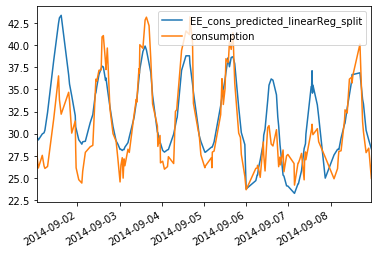

In [42]:
predicted_DF_linearReg_split_sept_week1=predicted_DF_linearReg_split.loc['2014-09-01':'2014-09-08']
predicted_DF_linearReg_split_sept_week1.plot()

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_split = mean_absolute_error(predicted_linearReg_split,y_test)
MSE_linearReg_split = mean_squared_error(predicted_linearReg_split,y_test)
R2_linear_split=r2_score(predicted_linearReg_split,y_test)
print('MAE : ' + str(MAE_linearReg_split))
print('MSE : ' + str(MSE_linearReg_split))
print('R2 : ' + str(R2_linear_split))

MAE : 3.3371682141942998
MSE : 2589.129079775016
R2 : 0.01026858510164308


###Cross Validation Method, Linear Regression

In [0]:
from sklearn.model_selection import cross_val_predict
predict_linearReg_CV = cross_val_predict(linear_reg,DF_features,DF_target) 

Pay attention that the latter gives us prediction for all of the rows

In [45]:
predicted_DF_linearReg_CV = pd.DataFrame(predict_linearReg_CV, index=DF_target.index, columns=["EE_cons_predicted_linearReg_CV"])
predicted_DF_linearReg_CV.head(24)


,EE_cons_predicted_linearReg_CV
2014-01-15 13:15:00,41.252861
2014-01-15 13:30:00,41.499718
2014-01-15 13:45:00,41.771805
2014-01-15 14:00:00,41.985298
2014-01-15 14:15:00,42.176956
2014-01-15 14:30:00,42.269440
2014-01-15 14:45:00,42.247040
2014-01-15 15:00:00,41.982296
2014-01-15 15:15:00,42.050453
2014-01-15 15:30:00,42.026176


In [46]:
predicted_DF_linearReg_CV=predicted_DF_linearReg_CV.join(DF_target)
predicted_DF_linearReg_CV

,EE_cons_predicted_linearReg_CV,consumption
2014-01-15 13:15:00,41.252861,38.87000
2014-01-15 13:30:00,41.499718,37.82500
2014-01-15 13:45:00,41.771805,37.85250
2014-01-15 14:00:00,41.985298,41.72750
2014-01-15 14:15:00,42.176956,40.17750
...,...,...
2015-06-30 18:30:00,42.311310,37.97601
2015-06-30 19:30:00,40.534912,51.99200
2015-06-30 19:45:00,43.369110,51.95200
2015-06-30 20:00:00,41.663055,47.01600


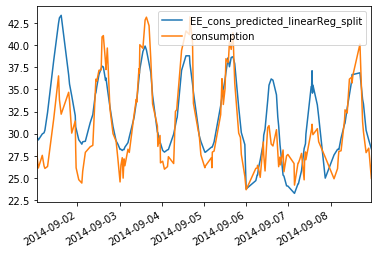

In [47]:
predicted_DF_linearReg_CV_sept_week1=predicted_DF_linearReg_split.loc['2014-09-01':'2014-09-08']
predicted_DF_linearReg_CV_sept_week1.plot()

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
MAE_linearReg_CV = mean_absolute_error(predict_linearReg_CV,DF_target)
MSE_linearReg_CV = mean_squared_error(predict_linearReg_CV,DF_target)
R2_linear_CV=r2_score(predict_linearReg_CV,DF_target)
print('MAE : ' + str(MAE_linearReg_CV))
print('MSE : ' + str(MSE_linearReg_CV))
print('R2 : ' + str(R2_linear_CV))

MAE : 5.5394506552715175
MSE : 84416.34380461082
R2 : 0.0005667778710184423


### Cross Validation Method, Random Forrest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor()

In [0]:
predict_RF_reg_CV = cross_val_predict(RF_reg,DF_features,DF_target, cv=10)

In [51]:
Predicted_DF_RF_reg_CV = pd.DataFrame(predict_RF_reg_CV, index= DF_target.index, columns=["EE_cons_predicted_RF_reg_CV"])
Predicted_DF_RF_reg_CV.head(24)

,EE_cons_predicted_RF_reg_CV
2014-01-15 13:15:00,37.023986
2014-01-15 13:30:00,40.134077
2014-01-15 13:45:00,38.970104
2014-01-15 14:00:00,39.705748
2014-01-15 14:15:00,48.563278
2014-01-15 14:30:00,41.605571
2014-01-15 14:45:00,38.359496
2014-01-15 15:00:00,50.195316
2014-01-15 15:15:00,39.343642
2014-01-15 15:30:00,37.525092


In [0]:
Predicted_DF_RF_reg_CV=Predicted_DF_RF_reg_CV.join(DF_target)

In [53]:
Predicted_DF_RF_reg_CV.head(20)


,EE_cons_predicted_RF_reg_CV,consumption
2014-01-15 13:15:00,37.023986,38.8700
2014-01-15 13:30:00,40.134077,37.8250
2014-01-15 13:45:00,38.970104,37.8525
2014-01-15 14:00:00,39.705748,41.7275
2014-01-15 14:15:00,48.563278,40.1775
2014-01-15 14:30:00,41.605571,37.6475
2014-01-15 14:45:00,38.359496,42.4025
2014-01-15 15:00:00,50.195316,38.6725
2014-01-15 15:15:00,39.343642,37.7675
2014-01-15 15:30:00,37.525092,40.4325


Predicted_DF_RF_reg_CV_august = Predicted_DF_RF_reg_CV.loc["2014-08-01":"2014-08-08",:]
Predicted_DF_RF_reg_CV_august.plot()

In [54]:
MAE_RF_reg_CV= mean_absolute_error(predict_RF_reg_CV,DF_target)
MSE_RF_reg_CV= mean_squared_error(predict_RF_reg_CV,DF_target)
R2_RF_reg_CV = r2_score(predict_RF_reg_CV,DF_target)
print("MAE CV:"+str(MAE_RF_reg_CV))
print("MSE CV:"+ str(MSE_RF_reg_CV))
print("R2 CV:"+str(R2_RF_reg_CV))

MAE CV:1.5931710819436808
MSE CV:22.733302909850277
R2 CV:0.30608848050395776


### Online learning
we need to sort our data frame first as truncate function needs a sorted data frame

In [0]:
DF_joined = DF_joined.sort_index()

In [56]:
DF_onlineConsumptionPrediction = pd.DataFrame(index=DF_joined.index)

firstTimeStampMeasured=DF_joined.index[0]
lastTimeStampMeasured= DF_joined.index[-1]

DF_onlineConsumptionPrediction

""
2014-01-15 13:15:00
2014-01-15 13:30:00
2014-01-15 13:45:00
2014-01-15 14:00:00
2014-01-15 14:15:00
...
2015-06-30 18:30:00
2015-06-30 19:30:00
2015-06-30 19:45:00
2015-06-30 20:00:00


We eant to assign a one month training period. the "prediction" period starts one month after the first time stamp measured, and lasts to the final day.

In [57]:
firstTimeStampMeasured

Timestamp('2014-01-15 13:15:00')

In [58]:
lastTimeStampMeasured

Timestamp('2015-06-30 22:15:00')

In [59]:
periodOfTraining = pd.Timedelta(30, unit="d")
periodOfTraining

Timedelta('30 days 00:00:00')

In [60]:
FirstTimeStampToPredict = firstTimeStampMeasured + periodOfTraining
FirstTimeStampToPredict

Timestamp('2014-02-14 13:15:00')

In [0]:
trainingStartTimeStamp = firstTimeStampMeasured
trainingEndTimeStamp = FirstTimeStampToPredict - pd.Timedelta(1,unit="h")


In [62]:
trainingStartTimeStamp

Timestamp('2014-01-15 13:15:00')

In [63]:
trainingEndTimeStamp

Timestamp('2014-02-14 12:15:00')

In [64]:
DF_onlineConsumptionPrediction=DF_onlineConsumptionPrediction.sort_index()
DF_onlineConsumptionPrediction

""
2014-01-15 13:15:00
2014-01-15 13:30:00
2014-01-15 13:45:00
2014-01-15 14:00:00
2014-01-15 14:15:00
...
2015-06-30 18:30:00
2015-06-30 19:30:00
2015-06-30 19:45:00
2015-06-30 20:00:00


In [65]:
DF_onlineConsumptionPrediction = DF_onlineConsumptionPrediction.truncate(before=FirstTimeStampToPredict)    
DF_onlineConsumptionPrediction.index

DatetimeIndex(['2014-02-14 13:15:00', '2014-02-14 13:30:00',
               '2014-02-14 13:45:00', '2014-02-14 14:00:00',
               '2014-02-14 14:30:00', '2014-02-14 14:45:00',
               '2014-02-14 15:00:00', '2014-02-14 15:15:00',
               '2014-02-14 15:45:00', '2014-02-14 16:30:00',
               ...
               '2015-06-30 16:45:00', '2015-06-30 17:00:00',
               '2015-06-30 17:30:00', '2015-06-30 17:45:00',
               '2015-06-30 18:15:00', '2015-06-30 18:30:00',
               '2015-06-30 19:30:00', '2015-06-30 19:45:00',
               '2015-06-30 20:00:00', '2015-06-30 22:15:00'],
              dtype='datetime64[ns]', length=31321, freq=None)

First, we need to change DataFrames to numpy array so we use the function   "DataFrame.values" which return a Numpy representation of the DataFrame.

Second, some info about what the shape of a numpy array is:

for a 1D array, the shape would be (n,) where n is the number of elements in your array.

For a 2D array, the shape would be (n,m) where n is the number of rows and m is the number of columns in your array.

The shape property is usually used to get the current shape of an array, but may also be used to reshape the array in-place by assigning a tuple of array dimensions to it. As with numpy.reshape, one of the new shape dimensions can be -1, in which case its value is inferred from the size of the array and the remaining dimensions. Reshaping an array in-place will fail if a copy is required.

trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown

==> Reshape your data using array.reshape(-1, 1) if your data has a single feature


In [66]:
DF_target

2014-01-15 13:15:00    38.87000
2014-01-15 13:30:00    37.82500
2014-01-15 13:45:00    37.85250
2014-01-15 14:00:00    41.72750
2014-01-15 14:15:00    40.17750
                         ...   
2015-06-30 18:30:00    37.97601
2015-06-30 19:30:00    51.99200
2015-06-30 19:45:00    51.95200
2015-06-30 20:00:00    47.01600
2015-06-30 22:15:00    30.95992
Name: consumption, Length: 33050, dtype: float64

as we can see, DF_target is in a form of a panda series not a data frame, so we use ".to_frame" function to make it in the form of data frame.

In [67]:
DF_target_reshaped=DF_target.to_frame()
DF_target_reshaped

,consumption
2014-01-15 13:15:00,38.87000
2014-01-15 13:30:00,37.82500
2014-01-15 13:45:00,37.85250
2014-01-15 14:00:00,41.72750
2014-01-15 14:15:00,40.17750
...,...
2015-06-30 18:30:00,37.97601
2015-06-30 19:30:00,51.99200
2015-06-30 19:45:00,51.95200
2015-06-30 20:00:00,47.01600


In [68]:
DF_target2 = DF_joined.loc[:,["consumption"]]
DF_target2

,consumption
2014-01-15 13:15:00,38.87000
2014-01-15 13:30:00,37.82500
2014-01-15 13:45:00,37.85250
2014-01-15 14:00:00,41.72750
2014-01-15 14:15:00,40.17750
...,...
2015-06-30 18:30:00,37.97601
2015-06-30 19:30:00,51.99200
2015-06-30 19:45:00,51.95200
2015-06-30 20:00:00,47.01600


In [69]:
DF_joined.index

DatetimeIndex(['2014-01-15 13:15:00', '2014-01-15 13:30:00',
               '2014-01-15 13:45:00', '2014-01-15 14:00:00',
               '2014-01-15 14:15:00', '2014-01-15 14:30:00',
               '2014-01-15 14:45:00', '2014-01-15 15:00:00',
               '2014-01-15 15:15:00', '2014-01-15 15:30:00',
               ...
               '2015-06-30 16:45:00', '2015-06-30 17:00:00',
               '2015-06-30 17:30:00', '2015-06-30 17:45:00',
               '2015-06-30 18:15:00', '2015-06-30 18:30:00',
               '2015-06-30 19:30:00', '2015-06-30 19:45:00',
               '2015-06-30 20:00:00', '2015-06-30 22:15:00'],
              dtype='datetime64[ns]', length=33050, freq=None)

In [0]:
timeStampToPredict = FirstTimeStampToPredict  #means start one month (period of training) after the first time stamp measured
while(timeStampToPredict <= lastTimeStampMeasured): #do it from one month after the first time stamp measured to the last time stamp
  if timeStampToPredict in DF_joined.index:
    DF_features_train = DF_features.truncate(before=trainingStartTimeStamp, after=trainingEndTimeStamp) #from features in one month training period, remove whatever is outside this month
    DF_target_train = DF_target.truncate(before=trainingStartTimeStamp, after=trainingEndTimeStamp) #from target in one month training period, remove whatever is outside this month
    DF_features_test = DF_features.loc[timeStampToPredict,:].values.reshape(1,-1)    # reshape the values into standard numpy array form
    DF_target_test = DF_target2.loc[timeStampToPredict,"consumption"]  
    #lets train
    #RF_reg.fit(DF_features_train,DF_target_train)
    #linear_reg.fit(DF_features_train,DF_target_train)
    #predicted_consumption = RF_reg.predict(DF_feature_test)
    predicted_consumption = linear_reg.predict(DF_features_test)
    DF_onlineConsumptionPrediction.loc[timeStampToPredict,"Predicted"] = predicted_consumption
    DF_onlineConsumptionPrediction.loc[timeStampToPredict,"Real"] = DF_target_test
  else:
    pass


  timeStampToPredict = timeStampToPredict + pd.Timedelta(1,unit="h")  # the indicator is updated by one hour
  #now we have to shift forward the "one month training period" by an hour to make sure we use all the data set once as training.
  trainingStartTimeStamp = trainingStartTimeStamp + pd.Timedelta(1,unit="h")
  trainingEndTimeStamp = trainingEndTimeStamp + pd.Timedelta(1,unit="h")

In [0]:
DF_onlineConsumptionPrediction.dropna(inplace=True)

In [82]:
R2_Score_online_RF=r2_score(DF_onlineConsumptionPrediction[["Real"]],DF_onlineConsumptionPrediction[["Predicted"]])
R2_Score_online_RF


-6318.572558525706

## Apply Learning Models to Gas Consumption (!!!to be filled!!!)

### Train Test Split Method, Linear Regression(!!!to be filled!!!)

###Cross Validation Method, Linear Regression(!!!to be filled!!!)

### Cross Validation Method, Random Forrest Regression(!!!to be filled!!!)

### Online learning(!!!to be filled!!!)